In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
sys.path.insert(0, '.')
import utilities as ut

warnings.filterwarnings(action='ignore', category=UserWarning)

from mlxtend.plotting import plot_decision_regions

In [2]:
SEED = 1

WB_CANCER_URL = 'https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv'
wb_cancer = pd.read_csv(WB_CANCER_URL)

AUTO_MPG_URL = 'https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv'
auto_mpg = pd.read_csv(AUTO_MPG_URL)

In [3]:
def plot_labeled_decision_regions(X, y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0*2, 2.7*2), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

# source_code = inspect.getsource(my_function)
# print(source_code)

# **DT Classifier**

In [4]:
print(wb_cancer.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
X = wb_cancer[['radius_mean', 'concave points_mean']].astype(np.float64)
y = wb_cancer['diagnosis'].replace({'M': 1, 'B': 0}).astype(np.int64)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

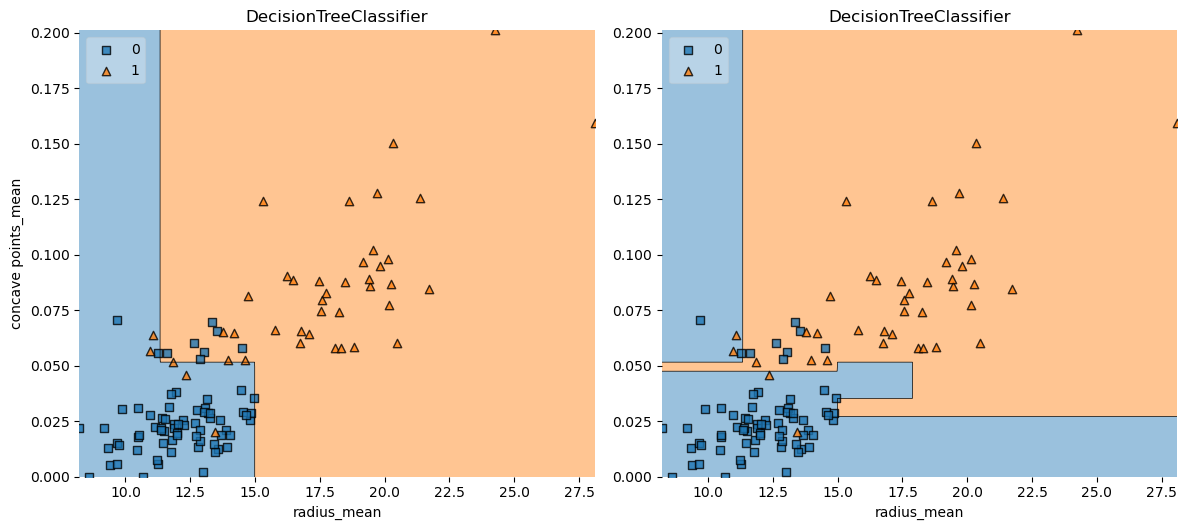

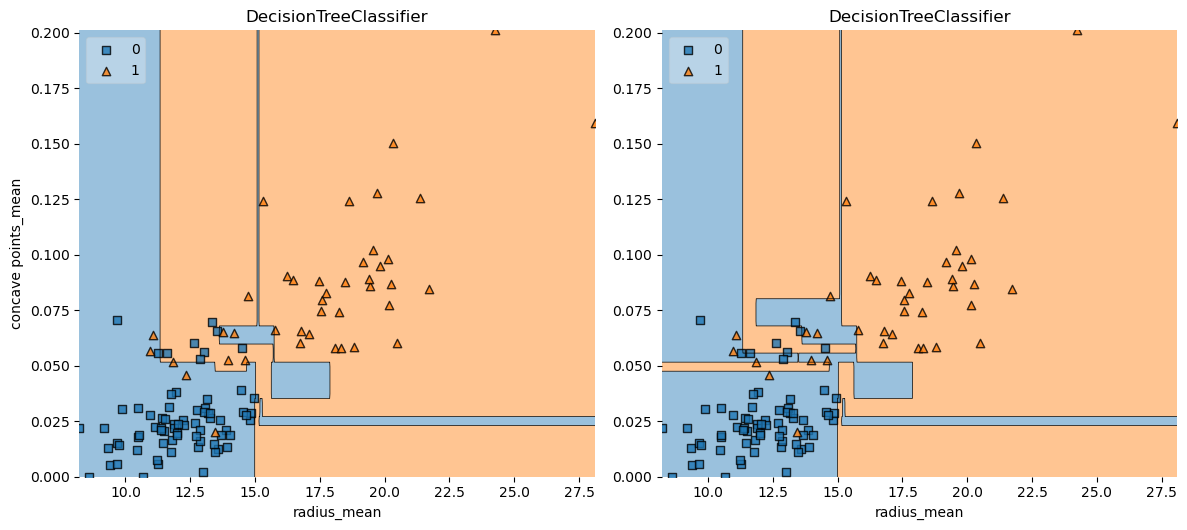

In [6]:
from sklearn.tree import DecisionTreeClassifier
# criterion='gini' 'entropy' 'log_loss'
dt_2 = DecisionTreeClassifier(max_depth=2, random_state=SEED)
dt_4 = DecisionTreeClassifier(max_depth=4, random_state=SEED)
dt_6 = DecisionTreeClassifier(max_depth=6, random_state=SEED)
dt_10 = DecisionTreeClassifier(max_depth=10, random_state=SEED)

dt_2.fit(X_train, y_train)
dt_4.fit(X_train, y_train)
dt_6.fit(X_train, y_train)
dt_10.fit(X_train, y_train)
clfs = [dt_2, dt_4, dt_6, dt_10]

plot_labeled_decision_regions(X_test, y_test, [dt_2, dt_4])
plot_labeled_decision_regions(X_test, y_test, [dt_6, dt_10])

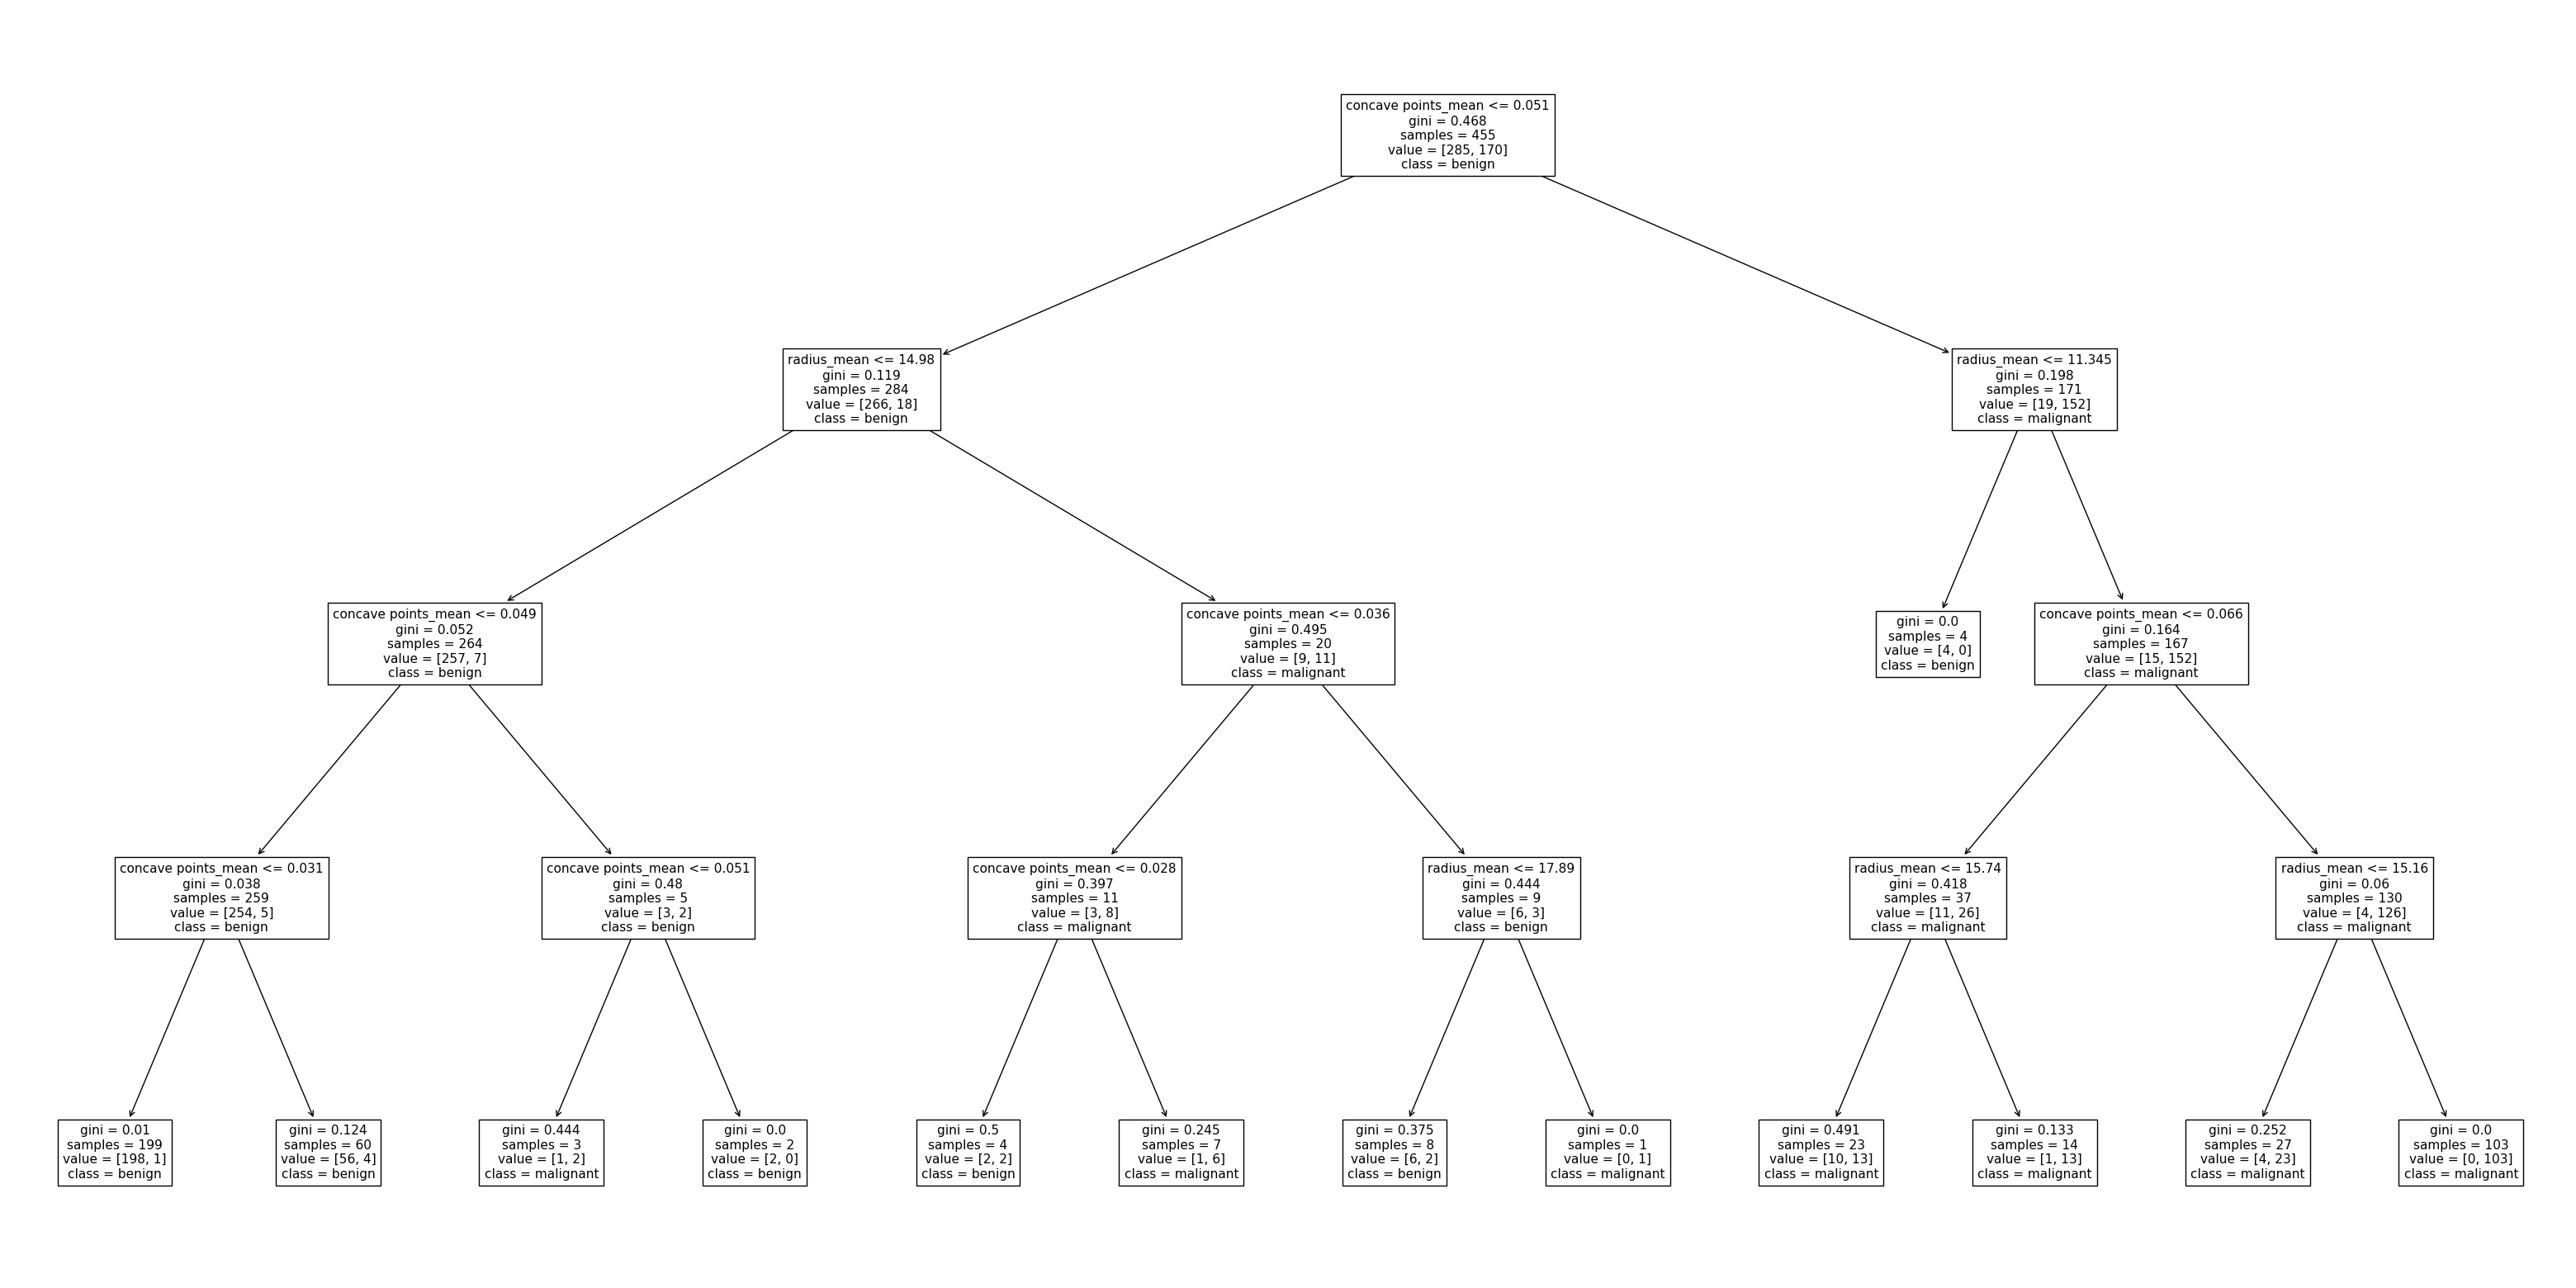

In [7]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20*2,10*2))
plot_tree(dt_4, feature_names=X.columns, class_names=['benign', 'malignant'])   # node_ids=True , filled=True, rounded=True, proportion=True
plt.show()

In [8]:
for dt in clfs:
    print(dt.get_params())
    print(f'\taccuracy on the training set: {dt.score(X_train, y_train):.3f}')    # of {dt.__class__.__name__}
    print(f'\taccuracy on the test set:     {dt.score(X_test, y_test):.3f}')

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
	accuracy on the training set: 0.932
	accuracy on the test set:     0.904
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
	accuracy on the training set: 0.943
	accuracy on the test set:     0.904
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
	accuracy on the training set: 0.

In [9]:
# # plot empty canvas
# plt.figure()
# plt.xlim(8, 30)
# plt.ylim(0, 0.21)
# plt.show()

# **DT Regressor**

In [10]:
auto_mpg

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0
...,...,...,...,...,...,...,...
387,18.0,250.0,88,3021,16.5,US,15.0
388,27.0,151.0,90,2950,17.3,US,10.0
389,29.5,98.0,68,2135,16.6,Asia,10.0
390,17.5,250.0,110,3520,16.4,US,15.0


<AxesSubplot:>

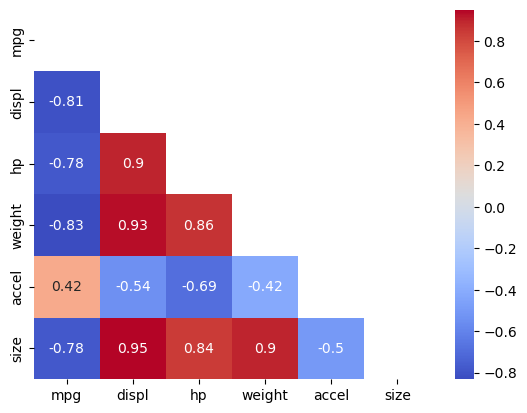

In [11]:
corr_matrix = auto_mpg.corr()
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True      # tril

sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, mask=mask)

Index(['mpg', 'displ', 'hp', 'weight', 'accel', 'origin', 'size'], dtype='object')


<AxesSubplot:xlabel='displ', ylabel='mpg'>

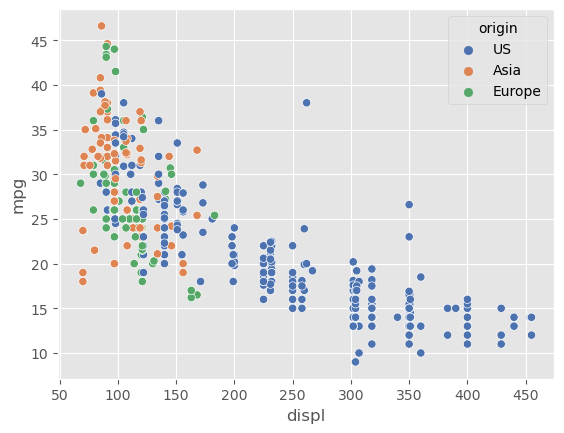

In [12]:
# auto_mpg['origin'].value_counts()
# sns.pairplot(auto_mpg, hue='origin')
plt.style.use('ggplot')

print(auto_mpg.columns)

sns.scatterplot(x='displ', y='mpg', hue='origin', data=auto_mpg, palette="deep")

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(auto_mpg[['origin']])

auto_mpg_onehot = pd.concat([
    auto_mpg, 
    pd.DataFrame(encoder.transform(auto_mpg[['origin']]).toarray(), columns=encoder.get_feature_names_out())],
    axis=1
).drop('origin', axis=1)

y = auto_mpg_onehot[['mpg']]
X = auto_mpg_onehot.drop('mpg', axis=1)[['displ']]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.05, random_state=SEED)     # porcentaje minimo de nodos por hoja
# hyperparameter tunning

# Fit dt to the training set
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mse(y_test, y_pred_dt)
rmse_dt = mse_dt ** (1/2)

In [16]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20*0.8,10*0.8))
# plot_tree(dt, feature_names=X.columns, filled=True)
# plt.show()

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
mse_lr = mse(y_test, y_pred_lr)
rmse_lr = mse_lr ** (1/2)

print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 5.52
Regression Tree test set RMSE: 5.04


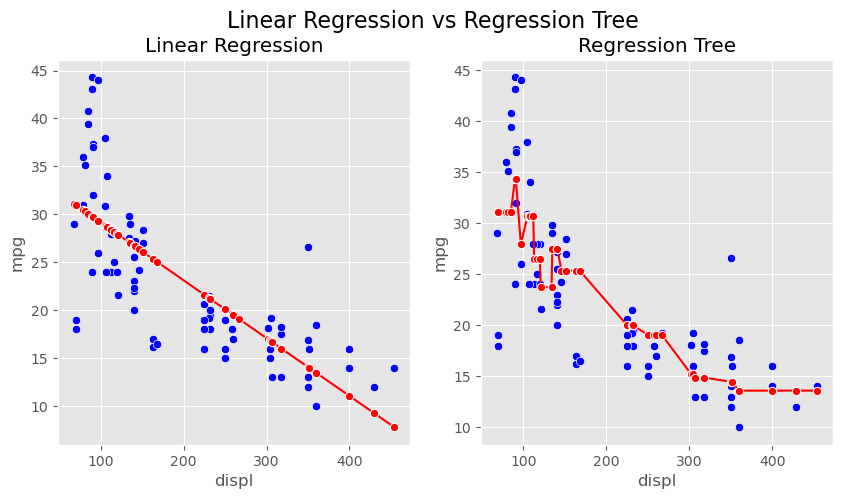

In [18]:
for xx, yy in [(X_test, y_test)]:       #  (X_train, y_train)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    y_pred_lr = lr.predict(xx)
    y_pred = dt.predict(xx)

    sns.scatterplot(x=xx['displ'].to_numpy(), y=yy.to_numpy().flatten(), ax=ax[0], color='blue')
    sns.lineplot(x=xx['displ'].to_numpy(), y=y_pred_lr.flatten(), ax=ax[0], color='red', marker="o")
    ax[0].set_title('Linear Regression')
    ax[0].set_xlabel('displ')
    ax[0].set_ylabel('mpg')

    sns.scatterplot(x=xx['displ'].to_numpy(), y=yy.to_numpy().flatten(), ax=ax[1], color='blue')
    sns.lineplot(x=xx['displ'].to_numpy(), y=y_pred.flatten(), ax=ax[1], color='red', marker="o")
    ax[1].set_title('Regression Tree')
    ax[1].set_xlabel('displ')
    ax[1].set_ylabel('mpg')
    fig.suptitle('Linear Regression vs Regression Tree', fontsize=16)
    fig.show()


In [19]:
ls = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# sort the list in descending order
ls.sort(reverse=True)
print(ls)

[9, 8, 7, 6, 5, 4, 3, 2, 1]
